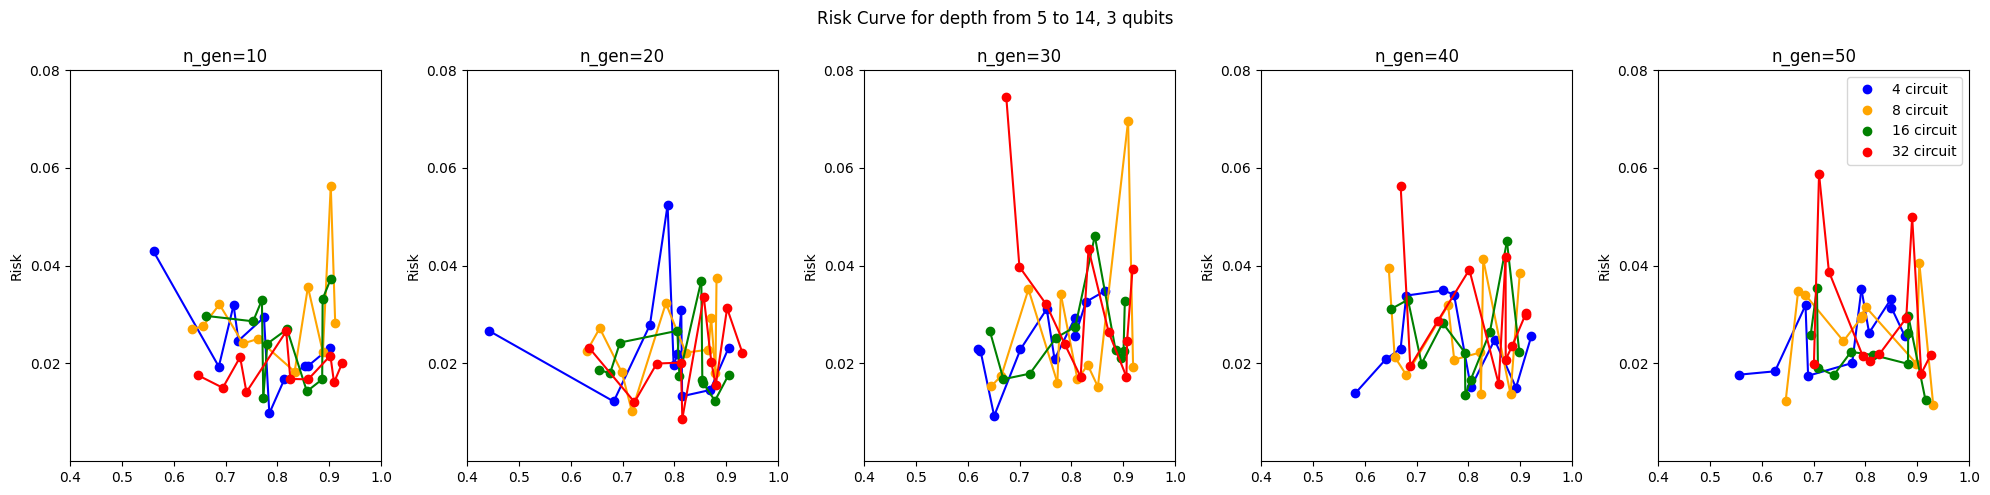

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def indices_for_sorted_order(data_list):
    # Enumerate the list and then sort by the elements, keeping track of the original indices
    sorted_indices = [index for index, value in sorted(enumerate(data_list), key=lambda x: x[1])]
    return sorted_indices

def sort_by_indices(data_list, index_list):
    # Ensure the index list is the same length as the data list
    if len(data_list) != len(index_list):
        raise ValueError("Length of index_list must be the same as length of data_list")

    # Sort the data_list according to the index_list
    sorted_list = [data_list[i] for i in index_list]
    return sorted_list

n = 3
# Load the data
df = pd.read_csv('cost.csv')  # replace with your actual file path

# Filter the data for n = 3
df_filtered = df[df['n'] == n]

# Group by n_circuit, n_gen, and d, and calculate the mean of risk and cost
grouped = df_filtered.groupby(['n_circuit', 'n_gen', 'd'])['cost'].mean().reset_index()

# Get the unique values of n_circuit and n_gen
n_circuit_values = grouped['n_circuit'].unique()
n_gen_values = grouped['n_gen'].unique()

# Plot the average risk and cost curves for each n_circuit and n_gen
fig, axs = plt.subplots(1, len(n_gen_values), figsize=(20, 5))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, n_circuit in enumerate(n_circuit_values):
    
    for j, n_gen in enumerate(n_gen_values):
        # Plot cost
        axs[j].set_title(f'n_gen={n_gen}')
        data = grouped[(grouped['n_circuit'] == n_circuit) & (grouped['n_gen'] == n_gen)]
        # axs[i, j].plot(data['cost'], [0]*(len(data['cost'])), label='1-Cost', linestyle = '', marker = 'o')
        
        risks = []
        # Plot risk
        for d in range(5,15):
            # read value by key json
            with open(f'risk_{n}.json') as f:
                risk_data = json.load(f)
            risk = risk_data[f'n={n},d={d},n_circuit={n_circuit},n_gen={n_gen}']
            risks.append(risk)
        x = list((data['cost'] ))
        y = list(np.mean(risks, 1))
        y = sort_by_indices(y, indices_for_sorted_order(x))
        x = sorted(x)
        for k in range(0, len(x) - 1):
            axs[j].plot([x[k],x[k + 1]], [y[k], y[k+1]], color=colors[i])
        axs[j].plot(x, y, label=f'{n_circuit} circuit', linestyle='', marker = 'o', color = colors[i])
        axs[j].set_ylim(0, 0.08)
        axs[j].set_yticks([0.02, 0.04, 0.06, 0.08])
        axs[j].set_xlim(0.4, 1)
        #axs[i, j].fill_between(data['cost'], np.asarray(y) + np.asarray(yvar), np.asarray(y) - np.asarray(yvar), alpha = 0.2, color='r')
        # axs[i, j].legend()
        # axs[i, j].set_xlabel('1 - Cost')
        axs[j].set_ylabel('Risk')
        # for k in range(0, len(x)):
        #     axs[i,j].plot([x[k],x[k]], [0,y[k]], color='black')
        # axs[j].set_yscale('log')
plt.legend()
fig.suptitle(f'Risk Curve for depth from 5 to 14, 3 qubits')
plt.tight_layout()
#plt.savefig('../images/risk_curve2.eps', format='eps')
plt.show()

KeyError: 'n=2,d=4,n_circuit=4,n_gen=10'

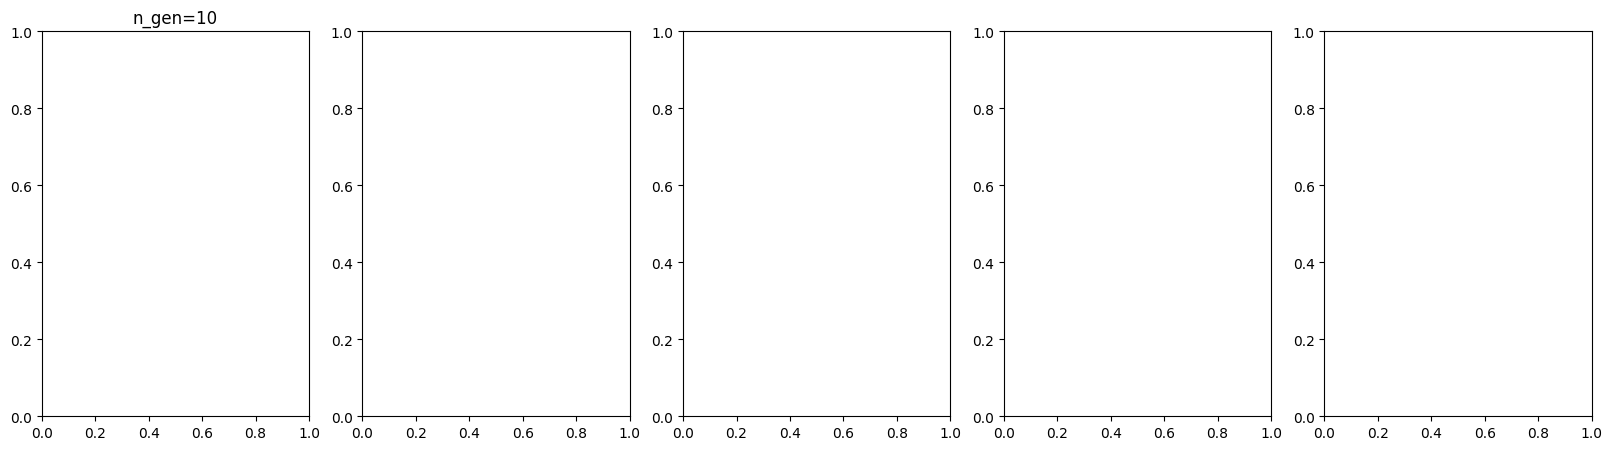

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def indices_for_sorted_order(data_list):
    # Enumerate the list and then sort by the elements, keeping track of the original indices
    sorted_indices = [index for index, value in sorted(enumerate(data_list), key=lambda x: x[1])]
    return sorted_indices

def sort_by_indices(data_list, index_list):
    # Ensure the index list is the same length as the data list
    if len(data_list) != len(index_list):
        raise ValueError("Length of index_list must be the same as length of data_list")

    # Sort the data_list according to the index_list
    sorted_list = [data_list[i] for i in index_list]
    return sorted_list

n = 2
# Load the data
df = pd.read_csv('cost.csv')  # replace with your actual file path

# Filter the data for n = 3
df_filtered = df[df['n'] == n]

# Group by n_circuit, n_gen, and d, and calculate the mean of risk and cost
grouped = df_filtered.groupby(['n_circuit', 'n_gen', 'd'])['cost'].mean().reset_index()

# Get the unique values of n_circuit and n_gen
n_circuit_values = grouped['n_circuit'].unique()
n_gen_values = grouped['n_gen'].unique()

# Plot the average risk and cost curves for each n_circuit and n_gen
fig, axs = plt.subplots(1, len(n_gen_values), figsize=(20, 5))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, n_circuit in enumerate(n_circuit_values):
    
    for j, n_gen in enumerate(n_gen_values):
        # Plot cost
        axs[j].set_title(f'n_gen={n_gen}')
        data = grouped[(grouped['n_circuit'] == n_circuit) & (grouped['n_gen'] == n_gen)]
        # axs[i, j].plot(data['cost'], [0]*(len(data['cost'])), label='1-Cost', linestyle = '', marker = 'o')
        
        risks = []
        # Plot risk
        for d in range(2,10):
            # read value by key json
            with open(f'risk_{n}.json') as f:
                risk_data = json.load(f)
            risk = risk_data[f'n={n},d={d},n_circuit={n_circuit},n_gen={n_gen}']
            risks.append(risk)
        x = list((data['cost'] ))
        y = list(np.mean(risks, 1))
        y = sort_by_indices(y, indices_for_sorted_order(x))
        x = sorted(x)
        for k in range(0, len(x) - 1):
            axs[j].plot([x[k],x[k + 1]], [y[k], y[k+1]], color=colors[i])
        axs[j].plot(x, y, label=f'{n_circuit} circuit', linestyle='', marker = 'o', color = colors[i])
        axs[j].set_ylim(0, 0.08)
        axs[j].set_yticks([0.02, 0.04, 0.06, 0.08])
        axs[j].set_xlim(0.4, 1)
        #axs[i, j].fill_between(data['cost'], np.asarray(y) + np.asarray(yvar), np.asarray(y) - np.asarray(yvar), alpha = 0.2, color='r')
        # axs[i, j].legend()
        # axs[i, j].set_xlabel('1 - Cost')
        axs[j].set_ylabel('Risk')
        # for k in range(0, len(x)):
        #     axs[i,j].plot([x[k],x[k]], [0,y[k]], color='black')
        # axs[j].set_yscale('log')
plt.legend()
fig.suptitle(f'Risk Curve for depth from 5 to 14, 3 qubits')
plt.tight_layout()
#plt.savefig('../images/risk_curve2.eps', format='eps')
plt.show()